<div align="center">

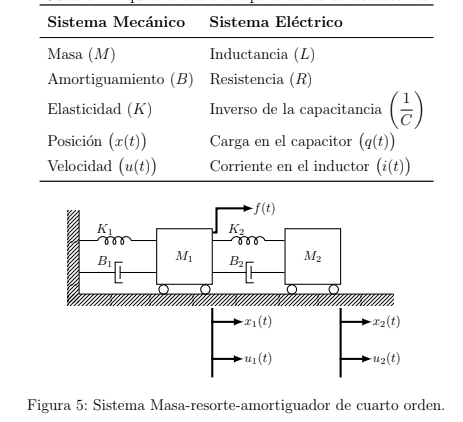

<div align="left">
A partir del sistema mecánico de cuarto orden y dados los valores: $B1 = 103 Ns/m$, $M1 = 0,9 g$, $M2 = 10,2 g$, $K1 = 1×106 N/kg$, $K2 = (1/0,7)×106 N/kg$, $f(t) = u(t)$, elabore un programa computacional en Octave, Matlab o Python con el cual, de forma iterativa sobre la variable B2, halle los valores de todos los elementos pasivos del circuito equivalente, de modo que la variable $x1(t)$ presente un valor máximo de $max(x1) = 1,2 μV$, con un margen de error no mayor a 0,01 μV.

Con los valores encontrados en el literal anterior, simule el circuito en uno de los siguientes programas computacionales y grafique el esquemático y su respuesta:
Orcad PSpice lite, Multisim Live, Circuitmaker, Matlab Simulink, Proteus, EasyE-
DA, Falstad, Everycircuit, Circuitlab, Sequel, Electric circuit studio, Eagle, LTspice, Partsim.

<div align="center">

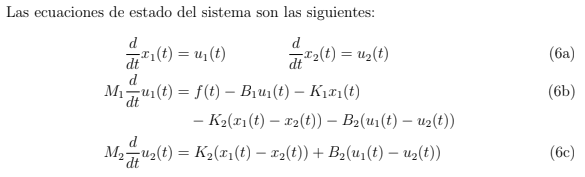

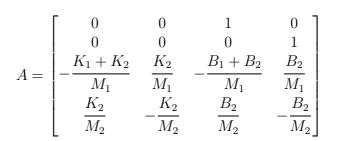

r2: 1.00, q1: 1.259675169540035e-06
r2: 2.00, q1: 1.2582056561263685e-06
r2: 3.00, q1: 1.2567572644291795e-06
r2: 4.00, q1: 1.2553247289633968e-06
r2: 5.00, q1: 1.2539178260205785e-06
r2: 6.00, q1: 1.2525098223365708e-06
r2: 7.00, q1: 1.2511306913630468e-06
r2: 8.00, q1: 1.249765515100981e-06
r2: 9.00, q1: 1.2484185644281612e-06
r2: 10.00, q1: 1.2470880557392061e-06
r2: 11.00, q1: 1.2457739202981137e-06
r2: 12.00, q1: 1.244475891474644e-06
r2: 13.00, q1: 1.243193510002858e-06
r2: 14.00, q1: 1.2419272945409176e-06
r2: 15.00, q1: 1.2406768097040424e-06
r2: 16.00, q1: 1.239441587780766e-06
r2: 17.00, q1: 1.2382216124934828e-06
r2: 18.00, q1: 1.2370165958449936e-06
r2: 19.00, q1: 1.23582629582047e-06
r2: 20.00, q1: 1.2346509503428639e-06
r2: 21.00, q1: 1.2334900102111656e-06
r2: 22.00, q1: 1.2323454080359165e-06
r2: 23.00, q1: 1.2312132331510643e-06
r2: 24.00, q1: 1.2300945655625192e-06
r2: 25.00, q1: 1.228991477804038e-06
r2: 26.00, q1: 1.2279029800322086e-06
r2: 27.00, q1: 1.226825894683

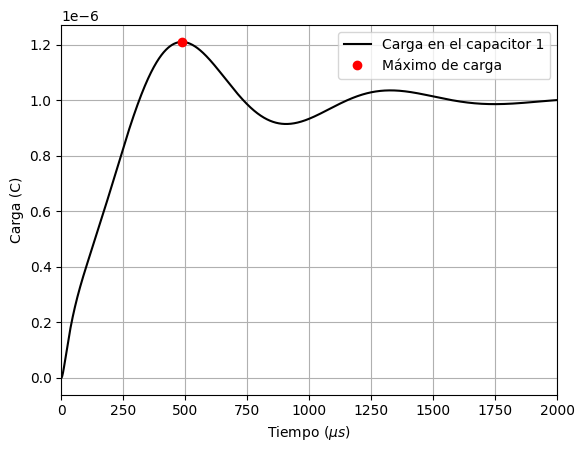

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos las ecuaciones diferenciales
def system_equations(y, t, c1, c2, l1, l2, r1, r2):
    # Desempaquetamos las variables
    q1, q2, i1, i2 = y
    # Definimos las ecuaciones
    f1 = i1 # dq1/dt
    f2 = i2 # dq2/dt
    f3 = - (((1/c1) + (1/c2))/(l1)) * q1 + (1/(c2*l1)) * q2 - ((r1+r2)/l1) * i1 + (r2 / l1) * i2 + (1/l1) # di1/dt
    f4 = (1/(c2*l2)) * q1 - (1/(c2*l2)) * q2 + (r2/l2) * i1 - (r2/l2) * i2  #di2/dt
    return [f1, f2, f3, f4]

# Configuraciones iniciales
y0 = [0, 0, 0, 0]  # Valores iniciales (q1, q2, i1, i2)
t = np.linspace(0, 100E-3, 100000)  # Tiempo de simulación
max_q1 = 1.2E-6  # Valor máximo para q1
threshold = 0.01E-6  # Umbral de error

# Iteramos sobre una de las incógnitas
r2 = 0 # Valor inicial de R2
results = []

while True:
    # Resolvemos el sistema
    solution = odeint(system_equations, y0, t, args=(1E-6, 0.7E-6, 0.9E-3, 10.2E-3, 103, r2))  # Pasamos r2 a las ecuaciones
    q1_values = []
    for moment in solution:
        q1_values.append(moment[0]) # Obtenemos el valor final de q1

    # Verificamos si q1_final está dentro del umbral permitido
    if max(q1_values) - max_q1 < threshold:
        results.append((r2, max(q1_values)))
        break

    else:
        r2 += 1  # Incrementamos r2 para la siguiente iteración
        print(f"r2: {r2:.2f}, q1: {max(q1_values)}")

# Mostrar resultados
for r2, q1 in results:
    print(f"r2: {r2:.2f}, q1 final: {q1:.2e}")

plt.plot(q1_values, color="black", label="Carga en el capacitor 1")
plt.plot(np.argmax(q1_values), max(q1_values), "ro", label="Máximo de carga")
plt.xlabel("Tiempo ($\mu s$)")
plt.ylabel("Carga (C)")
plt.xlim(0,2000)
plt.legend()
plt.grid()
plt.show()
